# Day 4

## Part 1

- `@`s are rolls of paper
- `@`s are only accessible if <4/8 adjacent spaces are filled (locations outside the rid count as full)
- the solution is how many `@`s can be accessed.

In [25]:
from dataclasses import dataclass
import logging
from matplotlib import pyplot as plt
from pathlib import Path

from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file,
    ParseConfig as PC,
    markdown,
    plot_str_grid,
    Point2,
)

log = logging.getLogger("advent")
logging.basicConfig(level=logging.INFO)


parser = PC("\n", PC("", str))
grid = parse_from_file(Path("day_4.txt"), parser)

INFO:advent_of_code_utils.py:139 items loaded from "day_4.txt"


INFO:advent_of_code_utils.py:converted 139x139 to ints


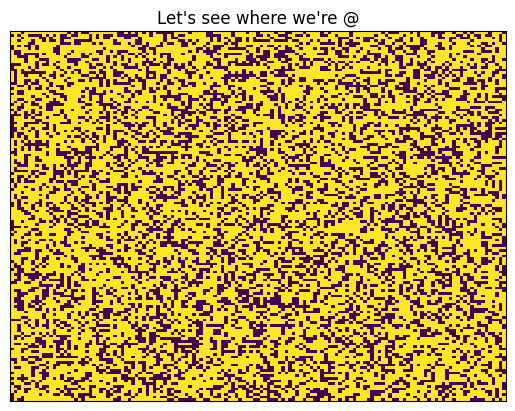

In [26]:
fig, ax = plt.subplots()
ax.set_title("Let's see where we're @")
plot_str_grid(grid, ax)

In [27]:
# so I think we need a few things:
# a function that returns valid grid locations
# ended up adding a new func to Point2 for this - adjacent8()

def get_adjacent(point: Point2) -> list[Point2]:
    """returns valid grid positions"""
    max_line = len(grid) - 1
    max_col = len(grid[0]) - 1
    adjacent = []
    for adj_point in point.adjacent8():
        line = adj_point.l

        # vertical bounds
        if line < 0 or line > max_line:
            continue

        col = adj_point.c

        # horz bounds
        if col < 0 or col > max_col:
            continue

        # ...else
        adjacent.append(adj_point)
    return adjacent

point = Point2(0, 0)
log.info(f"{point=}, {get_adjacent(point)=}")

point = Point2(1, 1)
log.info(f"{point=}, {get_adjacent(point)=}")

INFO:advent:point=(0, 0), get_adjacent(point)=[(1, 1), (0, 1), (1, 0)]
INFO:advent:point=(1, 1), get_adjacent(point)=[(0, 0), (0, 2), (2, 2), (2, 0), (0, 1), (1, 2), (2, 1), (1, 0)]


In [28]:
# great now we just have t count the ones that have @s in them
marked_grid = [line.copy() for line in grid]
roll = "@"
accessable = 0

for l, line in enumerate(grid):
    for c, value in enumerate(line):
        if grid[l][c] != roll:
            continue

        point = Point2(l, c)
        roll_count = 0

        for adj_point in get_adjacent(point):
            if grid[adj_point.l][adj_point.c] == roll:
                roll_count += 1
        
        if roll_count < 4:
            marked_grid[adj_point.l][adj_point.c] = "x"
            accessable += 1

INFO:advent_of_code_utils.py:converted 139x139 to ints


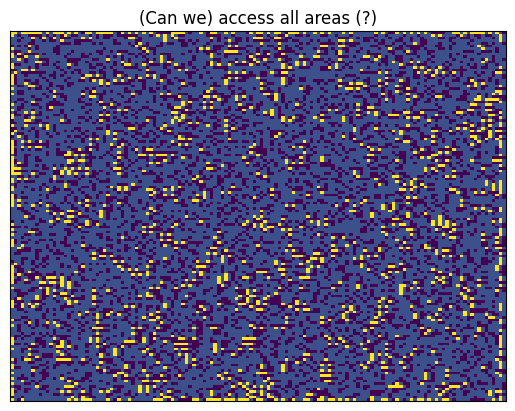

In [29]:
fig, ax = plt.subplots()
ax.set_title("(Can we) access all areas (?)")
plot_str_grid(marked_grid, ax)

In [30]:
log.info(f"There are {accessable} accessible rolls!")

INFO:advent:There are 1587 accessible rolls!
